# Mini-Batch Gradient Descent

Consider a mini-batch of 2 samples at time. Thus, the loss of the mini-batch is calculated as:

$$l_1(w, b) = \frac{1}{2} ((y_1 - wx_1 + b)^2 + (y_2 - wx_2 + b)^2)$$

For the next mini-batch, it is calculated as:

$$l_1(w, b) = \frac{1}{2} ((y_3 - wx_3 + b)^2 + (y_4 - wx_4 + b)^2)$$

The number of iterations in each epoch is calculated as:

$$\text{Iterations} = \frac{\text{training size}}{\text{batch size}}$$

In [1]:
%matplotlib inline
import torch
from matplotlib import pyplot as plt

In [2]:
def forward(x):
    y = w*x + b
    return y

def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

In [3]:
from torch.utils.data import Dataset

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 3*self.x+1
        self.y = self.f + 0.1*torch.randn(self.x.size())
        self.len = self.x.shape[0]

        
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    
    def __len__(self):
        return self.len

    
dataset = Data()

In [4]:
from torch.utils.data import DataLoader

trainloader = DataLoader(dataset=dataset, batch_size=4)

In [5]:
EPOCHS = 2

lr = 0.1
LOSS1 = []

# Define the parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

for epoch in range(EPOCHS+1):
    for x, y in trainloader:
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward()
        w.data = w.data - lr*(w.grad.data)
        w.grad.data.zero_()
    
        b.data = b.data - lr*(b.grad.data)
        b.grad.data.zero_()

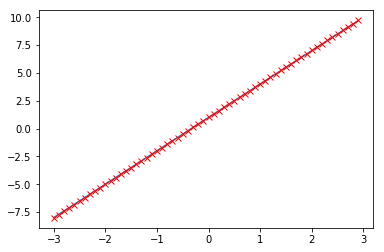

In [7]:
def plot_points(trainloader):
    points = []
    for x, y in trainloader:
        yhat = forward(x)
        points.extend(yhat)
        
    plt.plot(trainloader.dataset.x.numpy(), trainloader.dataset.f.numpy())
    plt.plot(trainloader.dataset.x.numpy(), points, 'rx')
    plt.show()
    
plot_points(trainloader)